In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
import yfinance as yf

# For time stamps
from datetime import datetime# Get the stock quote

In [2]:
df = yf.download('AAPL', 
                      start='2017-01-01', 
                      end='2022-02-22', 
                      progress=False,
)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.297693,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.267139,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.405802,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.711329,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.965153,134247600


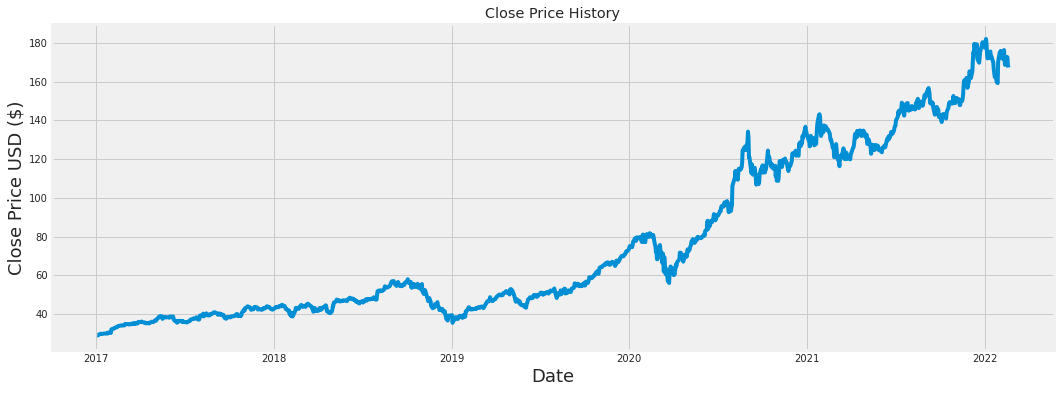

In [3]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [4]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .80 ))

training_data_len

1035

In [5]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[2.12419344e-04],
       [0.00000000e+00],
       [9.64027295e-04],
       ...,
       [9.38172009e-01],
       [9.14185876e-01],
       [9.03859404e-01]])

In [6]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00021242, 0.        , 0.00096403, 0.00308815, 0.00485278,
       0.00504886, 0.00609458, 0.00527761, 0.00493449, 0.00650306,
       0.00648672, 0.00614359, 0.00650306, 0.00663378, 0.00645405,
       0.00957485, 0.0096729 , 0.00968923, 0.00916637, 0.00870887,
       0.02079998, 0.02044051, 0.02133918, 0.02331623, 0.02534231,
       0.02617561, 0.02679651, 0.02630633, 0.02821803, 0.03104475,
       0.03184536, 0.03158395, 0.0321885 , 0.03378975, 0.03445967,
       0.03351198, 0.0337244 , 0.03416554, 0.0342636 , 0.0388386 ,
       0.03748245, 0.03882227, 0.03810333, 0.03839745, 0.0375478 ,
       0.03702493, 0.03777655, 0.03787458, 0.03753147, 0.03993335,
       0.04030915, 0.0391654 , 0.04156729, 0.0389203 , 0.04150192,
       0.04068495, 0.04022745, 0.0406196 , 0.04539069, 0.04591353])]
[0.0456030797713296]

[array([0.00021242, 0.        , 0.00096403, 0.00308815, 0.00485278,
       0.00504886, 0.00609458, 0.00527761, 0.00493449, 0.00650306,
       0.00648672, 0.00614359, 0.006

In [9]:
pip install Keras==2.7

Note: you may need to restart the kernel to use updated packages.


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2022-02-22 20:03:38.983163: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-22 20:03:38.983216: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-22 20:03:38.983278: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-1V030RT): /proc/driver/nvidia/version does not exist
2022-02-22 20:03:39.013341: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-22 20:03:39.923817: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLI

975/975 [==============================] - 39s 34ms/step - loss: 0.0019


In [13]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4.371272476600443

/tmp/ipykernel_8695/2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


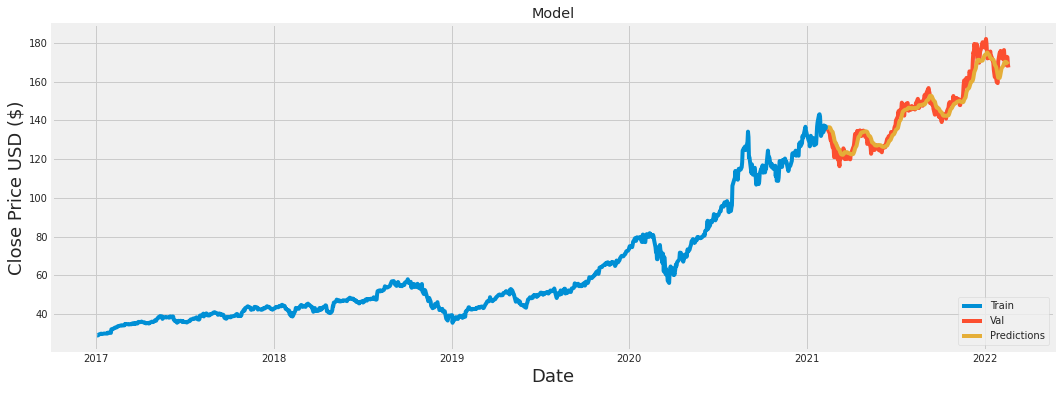

In [14]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [18]:
valid['diff'] = valid['Predictions'] - valid.Close 

/tmp/ipykernel_8695/116777240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['diff'] = valid['Predictions'] - valid.Close


In [20]:
valid

,Close,Predictions,diff
Date,,,
2021-02-12,135.369995,136.490662,1.120667
2021-02-16,133.190002,136.388718,3.198715
2021-02-17,130.839996,136.106720,5.266724
2021-02-18,129.710007,135.553268,5.843262
2021-02-19,129.869995,134.801834,4.931839
...,...,...,...
2022-02-14,168.880005,170.040848,1.160843
2022-02-15,172.789993,169.611450,-3.178543
2022-02-16,172.550003,169.415421,-3.134583


In [1]:
from keras.wrappers.scikit_learn import KerasClassifier